In [239]:
import yfinance as yf
import mplfinance as mpf

btc = yf.Ticker('BTC-USD')

btc_hist = btc.history(period='1mo', interval='15m')

# drop the columns that are not needed
btc_hist.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

print(len(btc_hist))

btc_hist

2881


,Open,High,Low,Close,Volume
Datetime,,,,,
2024-06-12 19:15:00+00:00,69170.890625,69192.062500,68555.218750,68560.406250,156852224
2024-06-12 19:30:00+00:00,68522.750000,68522.750000,68107.625000,68131.226562,764153856
2024-06-12 19:45:00+00:00,68126.609375,68126.609375,67361.812500,67500.039062,1053749248
2024-06-12 20:00:00+00:00,67568.132812,67787.031250,67456.046875,67741.304688,322367488
2024-06-12 20:15:00+00:00,67758.000000,67895.718750,67758.000000,67895.718750,270039040
...,...,...,...,...,...
2024-07-12 18:15:00+00:00,58217.949219,58304.734375,58126.339844,58153.015625,53442560
2024-07-12 18:30:00+00:00,58161.183594,58452.890625,58161.183594,58316.742188,211261440
2024-07-12 18:45:00+00:00,58414.703125,58532.554688,58324.429688,58324.429688,218822656


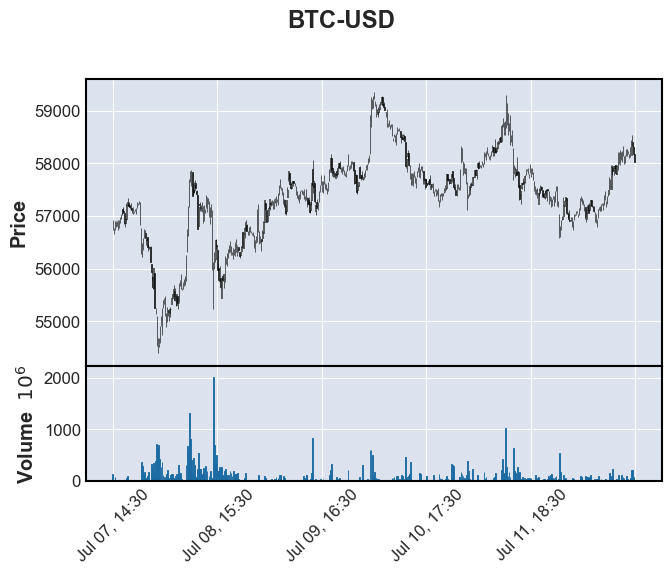

In [240]:
mpf.plot(btc_hist[-500:], type='candle', volume=True, title='BTC-USD')

In [241]:
# compute most popular indicators using ta library.
import pandas as pd
import pandas_ta as ta

btc_hist.set_index(pd.DatetimeIndex(btc_hist.index), inplace=True)

# # moving averages
# btc_hist.ta.sma(length=10, append=True)
# btc_hist.ta.sma(length=50, append=True)
# btc_hist.ta.sma(length=200, append=True)
#
# # exponential moving averages
# btc_hist.ta.ema(length=10, append=True)
# btc_hist.ta.ema(length=50, append=True)
# btc_hist.ta.ema(length=200, append=True)
#
# # RSI
# btc_hist.ta.rsi(length=14, append=True)
#
# # MACD
# btc_hist.ta.macd(append=True)
#
# # Bollinger Bands
# btc_hist.ta.bbands(append=True)
#
# # ATR
# btc_hist.ta.atr(append=True)
#
# # ADX
# btc_hist.ta.adx(append=True)
#
# # Stochastics
# btc_hist.ta.stoch(append=True)
# btc_hist.ta.stochrsi(append=True)

btc_hist

,Open,High,Low,Close,Volume
Datetime,,,,,
2024-06-12 19:15:00+00:00,69170.890625,69192.062500,68555.218750,68560.406250,156852224
2024-06-12 19:30:00+00:00,68522.750000,68522.750000,68107.625000,68131.226562,764153856
2024-06-12 19:45:00+00:00,68126.609375,68126.609375,67361.812500,67500.039062,1053749248
2024-06-12 20:00:00+00:00,67568.132812,67787.031250,67456.046875,67741.304688,322367488
2024-06-12 20:15:00+00:00,67758.000000,67895.718750,67758.000000,67895.718750,270039040
...,...,...,...,...,...
2024-07-12 18:15:00+00:00,58217.949219,58304.734375,58126.339844,58153.015625,53442560
2024-07-12 18:30:00+00:00,58161.183594,58452.890625,58161.183594,58316.742188,211261440
2024-07-12 18:45:00+00:00,58414.703125,58532.554688,58324.429688,58324.429688,218822656


In [242]:
dataset = btc_hist.copy()

First row index: 2024-06-12 19:15:00+00:00


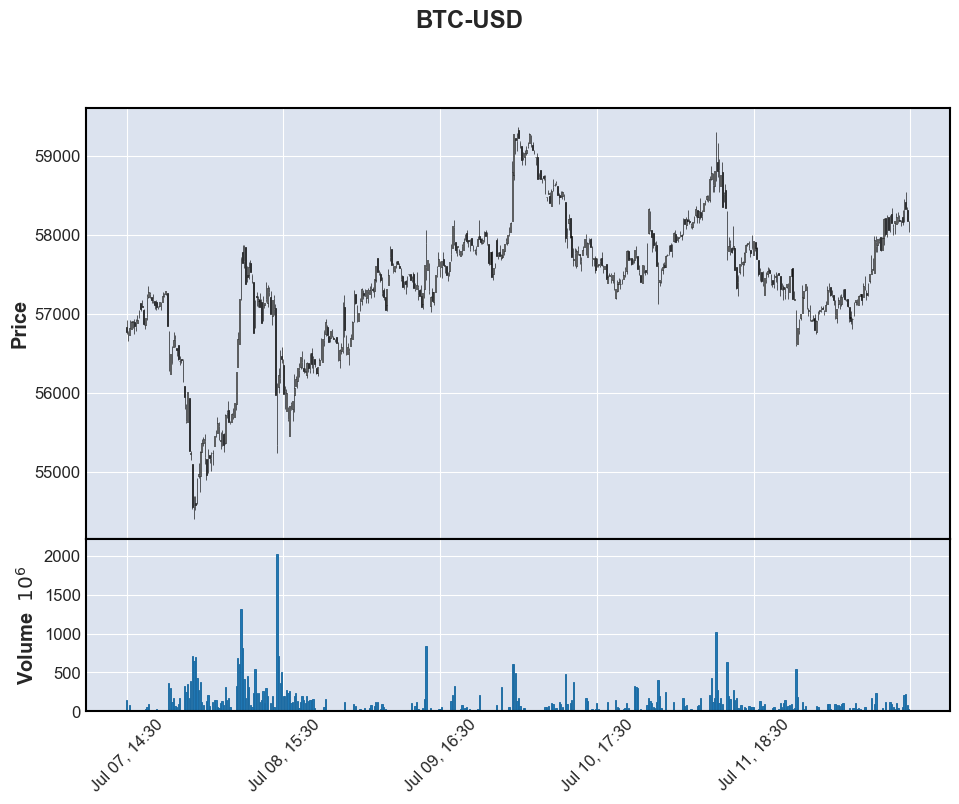

In [243]:
# find the first row index that has no NaN values. Similar to first_valid_index but return the row where all columns are not NaN
first_row = dataset.notnull().all(axis=1).idxmax()

print(f'First row index: {first_row}')

# drop the preceding rows
dataset = dataset.loc[first_row:]

to_plot = dataset[-500:]

# plot the data with the SMAs and EMAs, taking full screen width
mpf.plot(to_plot, type='candle', volume=True, title='BTC-USD', addplot=[
    # mpf.make_addplot(to_plot['SMA_10'], color='blue'),
    # mpf.make_addplot(to_plot['SMA_50'], color='green'),
    # mpf.make_addplot(to_plot['SMA_200'], color='red'),
    # mpf.make_addplot(to_plot['EMA_10'], color='blue'),
    # mpf.make_addplot(to_plot['EMA_50'], color='green'),
    # mpf.make_addplot(to_plot['EMA_200'], color='red'),
    # mpf.make_addplot(to_plot['RSI_14'], panel=1, color='black'),
    # mpf.make_addplot(to_plot['MACD_12_26_9'], panel=2, color='black'),
    # mpf.make_addplot(to_plot['MACDh_12_26_9'], panel=2, color='blue'),
    # mpf.make_addplot(to_plot['MACDs_12_26_9'], panel=2, color='red'),
    # mpf.make_addplot(to_plot['BBM_5_2.0'], panel=3, color='black'),
    # mpf.make_addplot(to_plot['BBU_5_2.0'], panel=3, color='blue'),
    # mpf.make_addplot(to_plot['BBL_5_2.0'], panel=3, color='blue'),
    # mpf.make_addplot(to_plot['ATRr_14'], panel=4, color='black'),
    # mpf.make_addplot(to_plot['ADX_14'], panel=5, color='black'),
    # mpf.make_addplot(to_plot['STOCHk_14_3_3'], panel=6, color='black'),
    # mpf.make_addplot(to_plot['STOCHd_14_3_3'], panel=6, color='blue'),
    # mpf.make_addplot(to_plot['STOCHRSIk_14_14_3_3'], panel=7, color='black'),
    # mpf.make_addplot(to_plot['STOCHRSId_14_14_3_3'], panel=7, color='blue'),
], figscale=1.5)

In [244]:
dataset

,Open,High,Low,Close,Volume
Datetime,,,,,
2024-06-12 19:15:00+00:00,69170.890625,69192.062500,68555.218750,68560.406250,156852224
2024-06-12 19:30:00+00:00,68522.750000,68522.750000,68107.625000,68131.226562,764153856
2024-06-12 19:45:00+00:00,68126.609375,68126.609375,67361.812500,67500.039062,1053749248
2024-06-12 20:00:00+00:00,67568.132812,67787.031250,67456.046875,67741.304688,322367488
2024-06-12 20:15:00+00:00,67758.000000,67895.718750,67758.000000,67895.718750,270039040
...,...,...,...,...,...
2024-07-12 18:15:00+00:00,58217.949219,58304.734375,58126.339844,58153.015625,53442560
2024-07-12 18:30:00+00:00,58161.183594,58452.890625,58161.183594,58316.742188,211261440
2024-07-12 18:45:00+00:00,58414.703125,58532.554688,58324.429688,58324.429688,218822656


In [245]:
# add a new column to the dataset that is the close value of the next row. This will be used to predict the next close value.
dataset['Next Close'] = dataset['Close'].shift(-1)
dataset

,Open,High,Low,Close,Volume,Next Close
Datetime,,,,,,
2024-06-12 19:15:00+00:00,69170.890625,69192.062500,68555.218750,68560.406250,156852224,68131.226562
2024-06-12 19:30:00+00:00,68522.750000,68522.750000,68107.625000,68131.226562,764153856,67500.039062
2024-06-12 19:45:00+00:00,68126.609375,68126.609375,67361.812500,67500.039062,1053749248,67741.304688
2024-06-12 20:00:00+00:00,67568.132812,67787.031250,67456.046875,67741.304688,322367488,67895.718750
2024-06-12 20:15:00+00:00,67758.000000,67895.718750,67758.000000,67895.718750,270039040,68256.375000
...,...,...,...,...,...,...
2024-07-12 18:15:00+00:00,58217.949219,58304.734375,58126.339844,58153.015625,53442560,58316.742188
2024-07-12 18:30:00+00:00,58161.183594,58452.890625,58161.183594,58316.742188,211261440,58324.429688
2024-07-12 18:45:00+00:00,58414.703125,58532.554688,58324.429688,58324.429688,218822656,58173.113281


In [246]:
print(f'Number of NaN values in the dataset: {dataset.isnull().sum().sum()}')

# drop the last row as it has NaN values
dataset.dropna(inplace=True)

print(f'Number of NaN values in the dataset after dropping: {dataset.isnull().sum().sum()}')

dataset

Number of NaN values in the dataset: 1
Number of NaN values in the dataset after dropping: 0


,Open,High,Low,Close,Volume,Next Close
Datetime,,,,,,
2024-06-12 19:15:00+00:00,69170.890625,69192.062500,68555.218750,68560.406250,156852224,68131.226562
2024-06-12 19:30:00+00:00,68522.750000,68522.750000,68107.625000,68131.226562,764153856,67500.039062
2024-06-12 19:45:00+00:00,68126.609375,68126.609375,67361.812500,67500.039062,1053749248,67741.304688
2024-06-12 20:00:00+00:00,67568.132812,67787.031250,67456.046875,67741.304688,322367488,67895.718750
2024-06-12 20:15:00+00:00,67758.000000,67895.718750,67758.000000,67895.718750,270039040,68256.375000
...,...,...,...,...,...,...
2024-07-12 18:00:00+00:00,58183.613281,58185.796875,58111.718750,58185.796875,13164544,58153.015625
2024-07-12 18:15:00+00:00,58217.949219,58304.734375,58126.339844,58153.015625,53442560,58316.742188
2024-07-12 18:30:00+00:00,58161.183594,58452.890625,58161.183594,58316.742188,211261440,58324.429688


In [247]:
# add a new column to the dataset that is the percentage change of the close value of the next row.
dataset['Expected Change'] = (dataset['Next Close'] - dataset['Close']) / dataset['Close']
dataset

,Open,High,Low,Close,Volume,Next Close,Expected Change
Datetime,,,,,,,
2024-06-12 19:15:00+00:00,69170.890625,69192.062500,68555.218750,68560.406250,156852224,68131.226562,-0.006260
2024-06-12 19:30:00+00:00,68522.750000,68522.750000,68107.625000,68131.226562,764153856,67500.039062,-0.009264
2024-06-12 19:45:00+00:00,68126.609375,68126.609375,67361.812500,67500.039062,1053749248,67741.304688,0.003574
2024-06-12 20:00:00+00:00,67568.132812,67787.031250,67456.046875,67741.304688,322367488,67895.718750,0.002279
2024-06-12 20:15:00+00:00,67758.000000,67895.718750,67758.000000,67895.718750,270039040,68256.375000,0.005312
...,...,...,...,...,...,...,...
2024-07-12 18:00:00+00:00,58183.613281,58185.796875,58111.718750,58185.796875,13164544,58153.015625,-0.000563
2024-07-12 18:15:00+00:00,58217.949219,58304.734375,58126.339844,58153.015625,53442560,58316.742188,0.002815
2024-07-12 18:30:00+00:00,58161.183594,58452.890625,58161.183594,58316.742188,211261440,58324.429688,0.000132


In [248]:
# start of the ML part
# goal is to predict the 'Expected Change' column using the other columns in the dataset (except 'Next Close' column).
# the model will perform a regression task.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# split the dataset into features and target
X = dataset.drop(columns=['Next Close', 'Expected Change'])

# target
Y = dataset['Expected Change']

In [249]:
X

,Open,High,Low,Close,Volume
Datetime,,,,,
2024-06-12 19:15:00+00:00,69170.890625,69192.062500,68555.218750,68560.406250,156852224
2024-06-12 19:30:00+00:00,68522.750000,68522.750000,68107.625000,68131.226562,764153856
2024-06-12 19:45:00+00:00,68126.609375,68126.609375,67361.812500,67500.039062,1053749248
2024-06-12 20:00:00+00:00,67568.132812,67787.031250,67456.046875,67741.304688,322367488
2024-06-12 20:15:00+00:00,67758.000000,67895.718750,67758.000000,67895.718750,270039040
...,...,...,...,...,...
2024-07-12 18:00:00+00:00,58183.613281,58185.796875,58111.718750,58185.796875,13164544
2024-07-12 18:15:00+00:00,58217.949219,58304.734375,58126.339844,58153.015625,53442560
2024-07-12 18:30:00+00:00,58161.183594,58452.890625,58161.183594,58316.742188,211261440


In [250]:
Y

Datetime
2024-06-12 19:15:00+00:00   -0.006260
2024-06-12 19:30:00+00:00   -0.009264
2024-06-12 19:45:00+00:00    0.003574
2024-06-12 20:00:00+00:00    0.002279
2024-06-12 20:15:00+00:00    0.005312
                               ...   
2024-07-12 18:00:00+00:00   -0.000563
2024-07-12 18:15:00+00:00    0.002815
2024-07-12 18:30:00+00:00    0.000132
2024-07-12 18:45:00+00:00   -0.002594
2024-07-12 19:00:00+00:00   -0.002517
Name: Expected Change, Length: 2880, dtype: float64

In [251]:
# split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [252]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (2592, 5)
X_test shape: (288, 5)
Y_train shape: (2592,)
Y_test shape: (288,)


In [333]:
X_train

,Open,High,Low,Close,Volume
Datetime,,,,,
2024-06-17 19:00:00+00:00,67059.859375,67059.859375,66773.125000,66810.507812,320102400
2024-06-21 11:45:00+00:00,63666.312500,63741.750000,63666.312500,63721.777344,29052928
2024-07-01 00:15:00+00:00,62521.285156,62648.875000,62521.285156,62648.875000,105517056
2024-06-21 00:00:00+00:00,64837.988281,64901.496094,64744.707031,64744.707031,0
2024-06-23 19:45:00+00:00,64085.742188,64097.371094,64076.687500,64097.371094,28105728
...,...,...,...,...,...
2024-06-29 20:45:00+00:00,60897.960938,60951.273438,60891.835938,60934.917969,6607872
2024-06-24 05:00:00+00:00,62817.820312,62819.519531,62716.054688,62716.054688,66816000
2024-06-24 13:45:00+00:00,61289.761719,61525.792969,61239.421875,61525.792969,334069760


In [254]:
from sklearn.preprocessing import StandardScaler

# scale the features
scaler = StandardScaler()

# scale while keeping the column names and datetime
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# the LSTM expects a 3D input, so reshape the data
X_train_scaled = X_train_scaled.values.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_scaled = X_test_scaled.values.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

In [255]:
X_train_scaled

array([[[ 1.49365191,  1.48015389,  1.42817441,  1.42543633,
          1.36514667]],

       [[ 0.53656762,  0.54056076,  0.55516472,  0.55351243,
         -0.35374008]],

       [[ 0.21363479,  0.23108999,  0.23341374,  0.25064068,
          0.09784355]],

       ...,

       [[-0.13369259, -0.08693454, -0.12678794, -0.0663964 ,
          1.44763543]],

       [[-0.05962869, -0.06170796, -0.04644212, -0.05272949,
         -0.52466841]],

       [[ 0.56075615,  0.58406404,  0.57926473,  0.60251876,
         -0.15952864]]])

In [256]:
X_test_scaled

array([[[ 1.15458054,  1.20261511,  1.17091588,  1.20105389,
          0.64687761]],

       [[-0.06619802, -0.07404582, -0.05270202, -0.0535477 ,
         -0.46391459]],

       [[-1.36232394, -1.36337756, -1.36609017, -1.39224363,
          0.56494522]],

       ...,

       [[ 0.44512248,  0.4277502 ,  0.4461834 ,  0.42837216,
         -0.14626029]],

       [[-0.17638939, -0.19664127, -0.1841292 , -0.20484188,
          0.23974357]],

       [[-1.52786603, -1.52889889, -1.50171367, -1.50948964,
         -0.52532154]]])

In [257]:
# now the same process but with a neural network (use MLPRegressor)
from sklearn.neural_network import MLPRegressor

# create the model
model = MLPRegressor(hidden_layer_sizes=(20, 20), max_iter=100000, random_state=42, alpha=0.0001,
                     learning_rate_init=0.001, learning_rate='constant', tol=1e-4, n_iter_no_change=10,
                     validation_fraction=0.1,
                     early_stopping=True,
                     activation='tanh',
                     solver='adam',
                     verbose=0
                     )

# train the model
model.fit(X_train_scaled, Y_train)

# print number of iterations
print(f'Number of iterations: {model.n_iter_}')

ValueError: Found array with dim 3. MLPRegressor expected <= 2.

In [258]:
import os
import numpy as np

space = np.logspace(-2, -5, 10)

pd.Series(space)

0    0.010000
1    0.004642
2    0.002154
3    0.001000
4    0.000464
5    0.000215
6    0.000100
7    0.000046
8    0.000022
9    0.000010
dtype: float64

In [62]:
parameter_space = {
    'hidden_layer_sizes': [(20, 20)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'learning_rate_init': space
}

from sklearn.model_selection import GridSearchCV

cpu_count = os.cpu_count()
print(f'Number of CPUs: {cpu_count}')

clf = GridSearchCV(model, parameter_space, n_jobs=cpu_count-1, verbose=2)
clf.fit(X_train_scaled, Y_train)

print(f'Best parameters found: {clf.best_params_}')

Number of CPUs: 8
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'activation': 'tanh', 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.004641588833612777, 'solver': 'adam'}


AttributeError: 'MLPRegressor' object has no attribute 'loss_curve_'

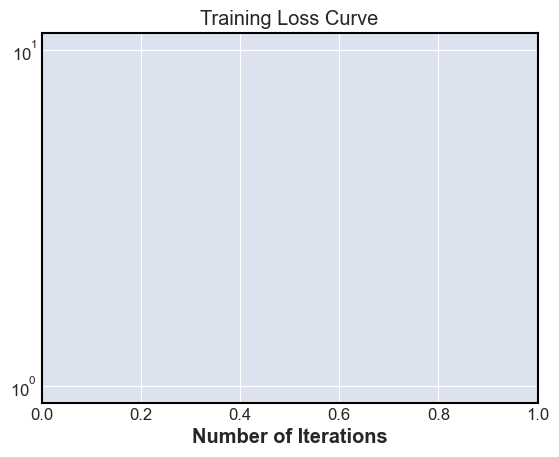

In [259]:
# plot the training loss, use log scale for y-axis
# also add the validation scores
import matplotlib.pyplot as plt

plt.yscale('log')
plt.xlabel('Number of Iterations')
plt.title('Training Loss Curve')

plt.plot(model.loss_curve_, label='Training Loss')
plt.legend()
plt.show()

# also plot the validation scores
plt.yscale('log')
plt.xlabel('Number of Iterations')
plt.title('Validation Scores')

# opposite the validation scores
values = [1 - x for x in model.validation_scores_]

plt.plot(values, label='Validation Scores')
plt.legend()
plt.show()

In [260]:
# make predictions
predictions = model.predict(X_test_scaled)

# calculate the mean squared error
mse = mean_squared_error(Y_test, predictions)
print(f'Mean Squared Error: {mse}')

pd.Series(predictions, name='Predictions')


NotFittedError: This MLPRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [261]:
# plot the predictions vs the actual values as a scatter plot. Use the same scale for both axes.
import matplotlib.pyplot as plt

assert len(Y_test) == len(predictions)

plt.scatter(Y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual vs Predicted Values')

global_min = min(min(Y_test), min(predictions))
global_max = max(max(Y_test), max(predictions))

plt.xlim(global_min, global_max)
plt.ylim(global_min, global_max)

plt.plot([global_min, global_max], [global_min, global_max], color='red')

plt.show()


AssertionError: 

In [66]:
# show expected and predicted values as a dataframe
df = pd.DataFrame({'Expected': Y_test, 'Predicted': predictions})

# add a percentage of error column
df['Error %'] = np.abs((df['Expected'] - df['Predicted']) / df['Expected']) * 100

# format percentage of error column
df['Error %'] = df['Error %'].map('{:.2f}%'.format)

df

,Expected,Predicted,Error %
Datetime,,,
2024-06-22 12:00:00+00:00,0.000701,0.007421,958.92%
2024-07-02 03:45:00+00:00,0.000361,-0.005749,1693.82%
2024-06-30 09:15:00+00:00,-0.000304,0.005161,1799.21%
2024-07-03 21:30:00+00:00,0.003182,-0.010342,424.99%
2024-06-16 21:45:00+00:00,0.003787,0.000903,76.15%
...,...,...,...
2024-07-02 01:30:00+00:00,0.001113,0.001395,25.31%
2024-06-29 21:00:00+00:00,0.001281,-0.006052,572.41%
2024-07-02 15:00:00+00:00,-0.002366,0.005348,326.05%


In [262]:
import tensorflow as tf

# import EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

# now train a model using keras and tensorflow on mac m1

input_count = X_train_scaled.shape[2]
print(f'Number of input features: {input_count}')

training_size = int(0.99 * X_train_scaled.shape[0])
validation_size = X_train_scaled.shape[0] - training_size

print(f'Training size: {training_size}, Validation size: {validation_size}')

Number of input features: 5
Training size: 2566, Validation size: 26


In [263]:
X_train_scaled

array([[[ 1.49365191,  1.48015389,  1.42817441,  1.42543633,
          1.36514667]],

       [[ 0.53656762,  0.54056076,  0.55516472,  0.55351243,
         -0.35374008]],

       [[ 0.21363479,  0.23108999,  0.23341374,  0.25064068,
          0.09784355]],

       ...,

       [[-0.13369259, -0.08693454, -0.12678794, -0.0663964 ,
          1.44763543]],

       [[-0.05962869, -0.06170796, -0.04644212, -0.05272949,
         -0.52466841]],

       [[ 0.56075615,  0.58406404,  0.57926473,  0.60251876,
         -0.15952864]]])

In [264]:
Y_train

Datetime
2024-06-17 19:00:00+00:00    0.000359
2024-06-21 11:45:00+00:00   -0.001488
2024-07-01 00:15:00+00:00    0.000891
2024-06-21 00:00:00+00:00    0.001553
2024-06-23 19:45:00+00:00   -0.000496
                               ...   
2024-06-29 20:45:00+00:00   -0.000763
2024-06-24 05:00:00+00:00   -0.002452
2024-06-24 13:45:00+00:00   -0.002029
2024-06-26 06:45:00+00:00    0.000708
2024-06-21 18:15:00+00:00    0.000733
Name: Expected Change, Length: 2592, dtype: float64

In [265]:
training_size = int(0.99 * X_train_scaled.shape[0])
validation_size = X_train_scaled.shape[0] - training_size

print(f'Training size: {training_size}, Validation size: {validation_size}')

Training size: 2566, Validation size: 26


In [266]:
X_train_scaled

array([[[ 1.49365191,  1.48015389,  1.42817441,  1.42543633,
          1.36514667]],

       [[ 0.53656762,  0.54056076,  0.55516472,  0.55351243,
         -0.35374008]],

       [[ 0.21363479,  0.23108999,  0.23341374,  0.25064068,
          0.09784355]],

       ...,

       [[-0.13369259, -0.08693454, -0.12678794, -0.0663964 ,
          1.44763543]],

       [[-0.05962869, -0.06170796, -0.04644212, -0.05272949,
         -0.52466841]],

       [[ 0.56075615,  0.58406404,  0.57926473,  0.60251876,
         -0.15952864]]])

In [332]:
X_train_scaled_arr = X_train_scaled

X_train_scaled_arr

array([[[ 1.49365191,  1.48015389,  1.42817441,  1.42543633,
          1.36514667]],

       [[ 0.53656762,  0.54056076,  0.55516472,  0.55351243,
         -0.35374008]],

       [[ 0.21363479,  0.23108999,  0.23341374,  0.25064068,
          0.09784355]],

       ...,

       [[-0.13369259, -0.08693454, -0.12678794, -0.0663964 ,
          1.44763543]],

       [[-0.05962869, -0.06170796, -0.04644212, -0.05272949,
         -0.52466841]],

       [[ 0.56075615,  0.58406404,  0.57926473,  0.60251876,
         -0.15952864]]])

In [340]:
import keras

print(f'Shape of X_train_scaled_arr: {X_train_scaled_arr.shape}')

# create the model, similar to the MLPRegressor model
# use a LSTM model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled_arr.shape[1], X_train_scaled_arr.shape[2])),
    keras.layers.LSTM(5, activation='tanh', return_sequences=False),
    keras.layers.Dense(16, activation='tanh'),
    keras.layers.Dense(1)
])

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# set the learning rate
model.optimizer.learning_rate = 0.00001

# train with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True, min_delta=1e-7)

# train it
model.fit(X_train_scaled_arr, Y_train, epochs=1000, validation_split=0.01, callbacks=[early_stopping])

Shape of X_train_scaled_arr: (2592, 1, 5)
Epoch 1/1000
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0120 - val_loss: 0.0086
Epoch 2/1000
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 0.0113 - val_loss: 0.0080
Epoch 3/1000
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.0100 - val_loss: 0.0074
Epoch 4/1000
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 0.0092 - val_loss: 0.0069
Epoch 5/1000
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.0089 - val_loss: 0.0064
Epoch 6/1000
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 0.0081 - val_loss: 0.0060
Epoch 7/1000
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.0073 - val_loss: 0.0056
Epoch 8/1000
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0073 - val_loss: 0.0052
Epoch 9/1000
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068 - val_loss: 0.0049
Epoch 10/1000
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.0067 - val_loss: 0.0046
Epoch 11/1000
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.0058 - val_loss: 0

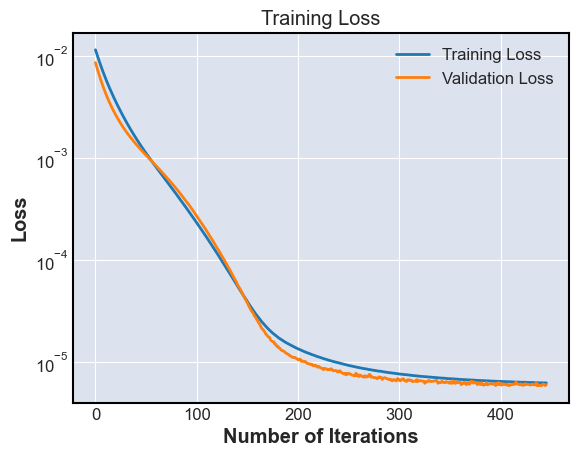

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
Mean Squared Error: 6.485920554511652e-06
                           Expected  Predicted  Correct
Datetime                                               
2024-06-17 17:00:00+00:00 -0.000966  -0.000775     True
2024-06-27 22:30:00+00:00 -0.000056   0.000378    False
2024-07-07 13:30:00+00:00  0.000463   0.000149     True
2024-06-29 11:30:00+00:00 -0.000377   0.001395    False
2024-06-24 04:45:00+00:00 -0.001499   0.000095    False
...                             ...        ...      ...
2024-06-24 05:30:00+00:00 -0.002271  -0.000532     True
2024-06-27 15:30:00+00:00 -0.000246   0.000527    False
2024-07-01 04:15:00+00:00 -0.001237  -0.000020     True
2024-06-24 13:00:00+00:00  0.002496   0.000573     True
2024-07-08 21:15:00+00:00  0.000015  -0.000562    False

[288 rows x 3 columns]
Percentage of correct predictions: 54.17%


In [341]:
# plot the training loss
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
# log scale for y-axis
plt.yscale('log')
plt.legend()
plt.show()
# make predictions
predictions = model.predict(X_test_scaled)

# transform to 2d array
predictions = predictions.flatten()

# calculate the mean squared error
mse = mean_squared_error(Y_test, predictions)
print(f'Mean Squared Error: {mse}')
# show expected and predicted values as a dataframe
df = pd.DataFrame({'Expected': Y_test, 'Predicted': predictions.flatten()})
df
# for each line, add if it is correct or not (just use the sign of the expected and predicted values)
df['Correct'] = np.sign(df['Expected']) == np.sign(df['Predicted'])

print(df)

# calculate the percentage of correct predictions
correct = df['Correct'].sum()
total = len(df)

percentage = (correct / total) * 100

print(f'Percentage of correct predictions: {percentage:.2f}%')